### DATA

In [1]:
#Process the raw PHEME data set

from src.utils import DatasetCreator

dataset_creator = DatasetCreator(multimodality=True)

/home/hp/anaconda3/envs/GNN_project/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_example = dataset_creator.get_dataframe()

In [3]:
data_example.head()

,id_post,class,subject,text,Media_url
0,525008613392515073,0,ottawashooting-all-rnr-threads,A Canadian soldier who was standing on guard f...,NaN
1,524922507380670464,0,ottawashooting-all-rnr-threads,#Ottawa police confirm shooting at War Memoria...,NaN
2,524981436252950528,0,ottawashooting-all-rnr-threads,Canadian authorities have given name of suspec...,NaN
3,524940077978640384,0,ottawashooting-all-rnr-threads,Police say the shooter is on roof of building ...,http://pbs.twimg.com/media/B0j2NMGIcAA4Jfw.jpg
4,524929796862918656,0,ottawashooting-all-rnr-threads,Soldier shot at National War Memorial in Ottaw...,http://pbs.twimg.com/media/B0js3klIUAEeKSG.jpg


In [4]:
data_example['class'].value_counts()

class
1    4023
0    2402
Name: count, dtype: int64

### PMIGraphConstructor

In [5]:
from src.utils import GraphConstructor

In [6]:
graph_constructor = GraphConstructor(multimodality=True,embedding='w2v')

In [7]:
first_row = data_example.iloc[0]
graph = graph_constructor.construct_graph(row=first_row)

In [8]:
first_row.text

'A Canadian soldier who was standing on guard for thee is gone. Our thoughts are w everyone affected by the shootings in Ottawa #CanadaStrong '

In [9]:
graph.nodes['who']['embedding'].shape

(300,)

In [10]:
print(graph)

Graph with 24 nodes and 240 edges


In [11]:
graph.graph

{'class': 0, 'subject': 'ottawashooting-all-rnr-threads'}

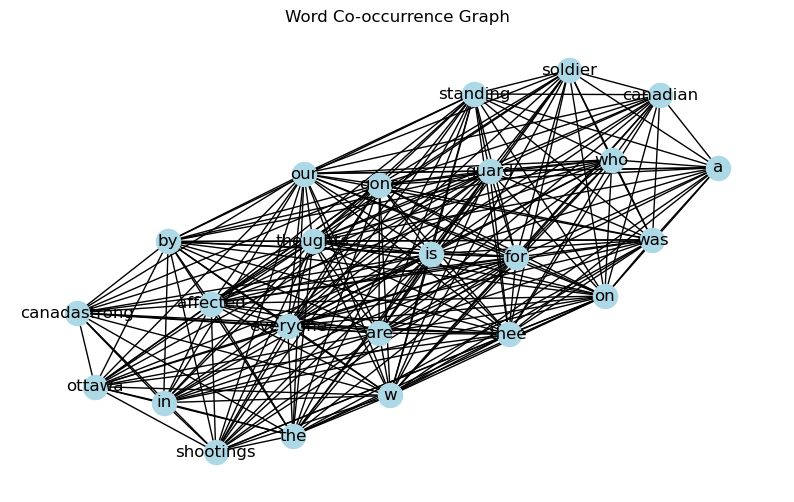

In [12]:
graph_constructor.visualize_graph(graph)

## PhemeDataset

In [ ]:
from src.utils.PHEME_dataset import PHEMEDataset

pheme_dataset = PHEMEDataset(embedding='bert',multimodality=True)

In [11]:
pheme_dataset

PHEMEDataset(4550)

In [12]:
from torch_geometric.loader import DataLoader

loader = DataLoader(pheme_dataset,batch_size=2,shuffle=True)

In [13]:
for x in loader:
    print(x)
    break

DataBatch(edge_index=[2, 28], class=[2], subject=[2], x=[29, 768], edge_attr=[28, 1], y=[2], batch=[29], ptr=[3])


In [14]:
x.x.shape

torch.Size([29, 768])

## GCN Model

In [15]:
from src.models import KMGCN

In [23]:
model = KMGCN(768,64,2,'max')

In [24]:
print(x.x.type())
print(x.edge_index.type())

torch.FloatTensor
torch.LongTensor


In [25]:
model(x).shape

torch.Size([2, 2])

In [33]:
data_example['class'].value_counts()

class
1    19
0    14
Name: count, dtype: int64